In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
col = ["Red", "Green", "Blue", "Clear"]
# colours = np.array(['ambient', 'black', 'Val', 'Sat', 'orange', 'pale_blue', 'pink', 'red', 'white', 'yellow'])
colours = np.array(['red'])

In [4]:
def txt_to_csv():
    for x in range(len(colours)):
        print(colours[x])
        card = np.genfromtxt(f"{colours[x]}2.txt", dtype=str, encoding=None, delimiter=",")
        card = card[:-1]
        card = card.astype(float)
        df = pd.DataFrame(card)
        df.columns = col
        df.to_csv(f"{colours[x]}2.csv")
# txt_to_csv()

In [5]:
def rgb_to_hsv(r, g, b): 

	# R, G, B values are divided by 255 
	# to change the range from 0..255 to 0..1: 
	r, g, b = r / 12100, g / 8200, b / 4300

	# h, s, v = hue, saturation, value 
	cmax = max(r, g, b) # maximum of r, g, b 
	cmin = min(r, g, b) # minimum of r, g, b 
	diff = cmax-cmin	 # diff of cmax and cmin. 

	# if cmax and cmax are equal then h = 0 
	if cmax == cmin: 
		h = 0
	
	# if cmax equal r then compute h 
	elif cmax == r: 
		h = (60 * ((g - b) / diff) + 360) % 360

	# if cmax equal g then compute h 
	elif cmax == g: 
		h = (60 * ((b - r) / diff) + 120) % 360

	# if cmax equal b then compute h 
	elif cmax == b: 
		h = (60 * ((r - g) / diff) + 240) % 360

	# if cmax equal zero 
	if cmax == 0: 
		s = 0
	else: 
		s = (diff / cmax) * 100

	# compute v 
	v = cmax * 100
	return h, s, v 


In [10]:
def hsv(colour_to_hsv):
    h_all = np.empty((len(colour_to_hsv)))
    s_all = np.empty((len(colour_to_hsv)))
    v_all = np.empty((len(colour_to_hsv)))
    for i in range(len(colour_to_hsv)):
        h, s, v = rgb_to_hsv(colour_to_hsv['Red'][i], colour_to_hsv['Green'][i], colour_to_hsv['Blue'][i])
        h_all[i] = h
        s_all[i] = s
        v_all[i] = v
    return h_all, s_all, v_all

In [11]:
blue = pd.read_csv('blue3.txt', sep=',')
blue.columns = col
h, s, v = hsv(blue)
blue["Hue"] = h
blue["Sat"] = s
blue["Val"] = v
blue.describe()

,Red,Green,Blue,Clear,Hue,Sat,Val
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,1212.742225,1063.129924,580.767795,2798.713891,188.052262,23.384480,13.506228
std,284.136518,308.252182,174.881719,729.129224,2.646602,8.026226,4.067017
min,732.000000,541.000000,285.000000,1565.000000,181.458316,8.725533,6.627907
25%,829.000000,647.000000,344.000000,1813.500000,186.042170,14.359504,8.000000
50%,1390.000000,1256.000000,690.000000,3254.000000,189.617608,28.410588,16.046512
75%,1398.000000,1264.000000,695.000000,3274.000000,189.705521,28.515969,16.162791
max,1409.000000,1277.000000,702.000000,3305.000000,189.898110,28.723129,16.325581


In [12]:
ambient = pd.read_csv('ambient3.txt', sep=',')
ambient.columns = col
h, s, v = hsv(ambient)
ambient["Hue"] = h
ambient["Sat"] = s
ambient["Val"] = v
ambient.describe()

,Red,Green,Blue,Clear,Hue,Sat,Val
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,546.106583,291.624608,154.144201,1030.657524,358.222411,21.201917,4.513278
std,2.392391,1.698255,1.181381,5.167723,0.568746,0.128205,0.019772
min,539.000000,287.000000,151.000000,1015.000000,355.166770,20.605779,4.454545
25%,544.000000,290.000000,153.000000,1026.000000,358.023734,21.103347,4.495868
50%,548.000000,293.000000,155.000000,1034.000000,358.023734,21.103347,4.528926
75%,548.000000,293.000000,155.000000,1035.000000,358.651857,21.336980,4.528926
max,552.000000,297.000000,159.000000,1039.000000,359.412214,21.608232,4.561983


In [13]:
black = pd.read_csv('black3.txt', sep=',')
black.columns = col
h, s, v = hsv(black)
black["Hue"] = h
black["Sat"] = s
black["Val"] = v
black.describe()

,Red,Green,Blue,Clear,Hue,Sat,Val
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,871.973487,534.316791,269.707002,1669.522774,15.658385,13.042242,7.206392
std,49.787398,35.312756,18.760770,97.364436,0.506150,1.424600,0.411466
min,550.000000,303.000000,148.000000,1039.000000,12.531663,12.259802,4.545455
25%,851.000000,520.000000,262.000000,1629.000000,15.130492,12.378011,7.033058
50%,896.000000,551.000000,279.000000,1716.000000,15.646630,12.573160,7.404959
75%,898.000000,552.000000,279.000000,1720.000000,15.928788,13.391290,7.421488
max,899.000000,553.000000,280.000000,1722.000000,17.025580,24.279070,7.429752


In [14]:
green = pd.read_csv('green3.txt', sep=',')
green.columns = col
h, s, v = hsv(green)
green["Hue"] = h
green["Sat"] = s
green["Val"] = v
green.describe()

,Red,Green,Blue,Clear,Hue,Sat,Val
count,1841.00000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000
mean,1270.37371,1432.258555,653.893536,3293.518197,160.472216,39.798576,17.466568
std,70.58626,103.812637,47.427434,212.962728,0.716666,1.290540,1.266008
min,860.00000,838.000000,383.000000,2069.000000,154.694650,30.452277,10.219512
25%,1226.00000,1363.000000,622.000000,3153.000000,160.139936,39.048070,16.621951
50%,1305.00000,1483.000000,677.000000,3398.000000,160.767666,40.394648,18.085366
75%,1309.00000,1490.000000,680.000000,3412.000000,160.835397,40.458176,18.170732
max,1320.00000,1507.000000,688.000000,3446.000000,161.008706,40.646231,18.378049


In [15]:
orange = pd.read_csv('orange3.txt', sep=',')
orange.columns = col
h, s, v = hsv(orange)
orange["Hue"] = h
orange["Sat"] = s
orange["Val"] = v
orange.describe()

,Red,Green,Blue,Clear,Hue,Sat,Val
count,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000
mean,6566.502160,1598.297516,1237.523758,8743.071814,344.114298,63.666854,54.268613
std,2293.172318,513.516481,422.922472,2983.668851,0.414425,1.198817,18.951837
min,3207.000000,849.000000,619.000000,4387.000000,343.475433,60.935682,26.504132
25%,4127.000000,1052.500000,787.750000,5569.250000,343.738433,62.418613,34.107438
50%,8714.000000,2077.000000,1632.000000,11539.000000,343.798086,64.740287,72.016529
75%,8778.000000,2095.000000,1646.000000,11622.000000,344.510383,64.822861,72.545455
max,8889.000000,2124.000000,1667.000000,11778.000000,350.874972,64.900707,73.462810


In [16]:
pale_blue = pd.read_csv('pale_blue3.txt', sep=',')
pale_blue.columns = col
h, s, v = hsv(pale_blue)
pale_blue["Hue"] = h
pale_blue["Sat"] = s
pale_blue["Val"] = v
pale_blue.describe()

,Red,Green,Blue,Clear,Hue,Sat,Val
count,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000
mean,6413.075404,5022.374626,2603.781568,13363.219031,174.882154,13.418867,61.248471
std,750.603681,608.356811,316.663316,1597.380550,0.454742,0.395687,7.418985
min,4928.000000,3817.000000,1975.000000,10208.000000,171.134119,12.506252,46.548780
25%,5600.000000,4365.000000,2261.000000,11636.000000,174.559357,13.029264,53.231707
50%,6837.000000,5368.000000,2784.000000,14267.000000,175.127268,13.694999,65.463415
75%,7021.000000,5516.000000,2860.000000,14659.000000,175.195946,13.717528,67.268293
max,7096.000000,5574.000000,2891.000000,14815.000000,178.780383,14.456036,67.975610


In [17]:
pink = pd.read_csv('pink3.txt', sep=',')
pink.columns = col
h, s, v = hsv(pink)
pink["Hue"] = h
pink["Sat"] = s
pink["Val"] = v
pink.describe()

,Red,Green,Blue,Clear,Hue,Sat,Val
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,7622.571849,4090.858068,2338.103651,13239.331567,340.091251,20.946084,62.996462
std,2816.327346,1523.218123,877.773870,4901.986046,1.800942,0.376392,23.275433
min,2933.000000,1558.000000,877.000000,5094.000000,338.441838,20.388859,24.239669
25%,3748.000000,1995.000000,1131.000000,6494.000000,338.869451,20.673474,30.975207
50%,9517.500000,5116.000000,2929.000000,16535.000000,338.906347,20.682020,78.657025
75%,9726.000000,5228.000000,2993.000000,16903.000000,342.187100,21.451184,80.380165
max,10277.000000,5529.000000,3165.000000,17880.000000,352.962249,21.642259,84.933884


In [18]:
red = pd.read_csv('red3.txt', sep=',')
red.columns = col
h, s, v = hsv(red)
red["Hue"] = h
red["Sat"] = s
red["Val"] = v
red.describe()

,Red,Green,Blue,Clear,Hue,Sat,Val
count,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000
mean,3737.496394,658.067909,643.575721,4658.309495,342.095560,72.929127,30.888400
std,1214.017995,158.555687,197.657771,1417.290951,0.890038,3.374553,10.033207
min,1682.000000,391.000000,310.000000,2264.000000,341.407106,65.697776,13.900826
25%,2146.000000,450.000000,384.000000,2799.000000,341.467845,69.062028,17.735537
50%,4489.000000,757.000000,766.000000,5536.000000,341.506556,75.100723,37.099174
75%,4667.000000,779.000000,795.000000,5743.000000,343.096762,75.374944,38.570248
max,4897.000000,806.000000,830.000000,6013.000000,345.022586,75.718962,40.471074


In [19]:
white = pd.read_csv('white3.txt', sep=',')
white.columns = col
h, s, v = hsv(white)
white["Hue"] = h
white["Sat"] = s
white["Val"] = v
white.describe()

,Red,Green,Blue,Clear,Hue,Sat,Val
count,1803.000000,1803.000000,1803.000000,1803.00000,1803.000000,1803.000000,1803.000000
mean,10968.052135,7392.234609,3925.126456,21108.96173,269.827348,1.277117,91.307250
std,1699.150995,1174.756553,623.994901,3331.25137,23.072402,0.079832,14.469403
min,7101.000000,4731.000000,2509.000000,13564.00000,252.814443,0.968526,58.685950
25%,8665.000000,5798.000000,3079.000000,16587.00000,253.981778,1.239027,71.611570
50%,12077.000000,8160.000000,4333.000000,23283.00000,255.252387,1.250717,100.767442
75%,12104.000000,8179.000000,4343.000000,23338.00000,300.822052,1.266395,101.000000
max,12161.000000,8216.000000,4363.000000,23450.00000,320.414020,2.118417,101.465116


In [20]:
yellow = pd.read_csv('yellow3.txt', sep=',')
yellow.columns = col
h, s, v = hsv(yellow)
yellow["Hue"] = h
yellow["Sat"] = s
yellow["Val"] = v
yellow.describe()

,Red,Green,Blue,Clear,Hue,Sat,Val
count,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000
mean,9704.679712,4833.616375,2652.191040,16191.390834,352.303896,26.549579,80.203965
std,1967.389705,991.273413,543.590591,3317.599700,0.169415,0.229240,16.259419
min,3645.000000,1811.000000,983.000000,6089.000000,350.668067,26.331691,30.123967
25%,7817.750000,3882.250000,2133.000000,12993.000000,352.246976,26.384976,64.609504
50%,11034.000000,5503.000000,3019.000000,18434.500000,352.278333,26.425029,91.190083
75%,11125.000000,5551.000000,3045.000000,18593.000000,352.308666,26.728994,91.942149
max,11285.000000,5631.000000,3089.000000,18866.000000,354.214671,27.147486,93.264463


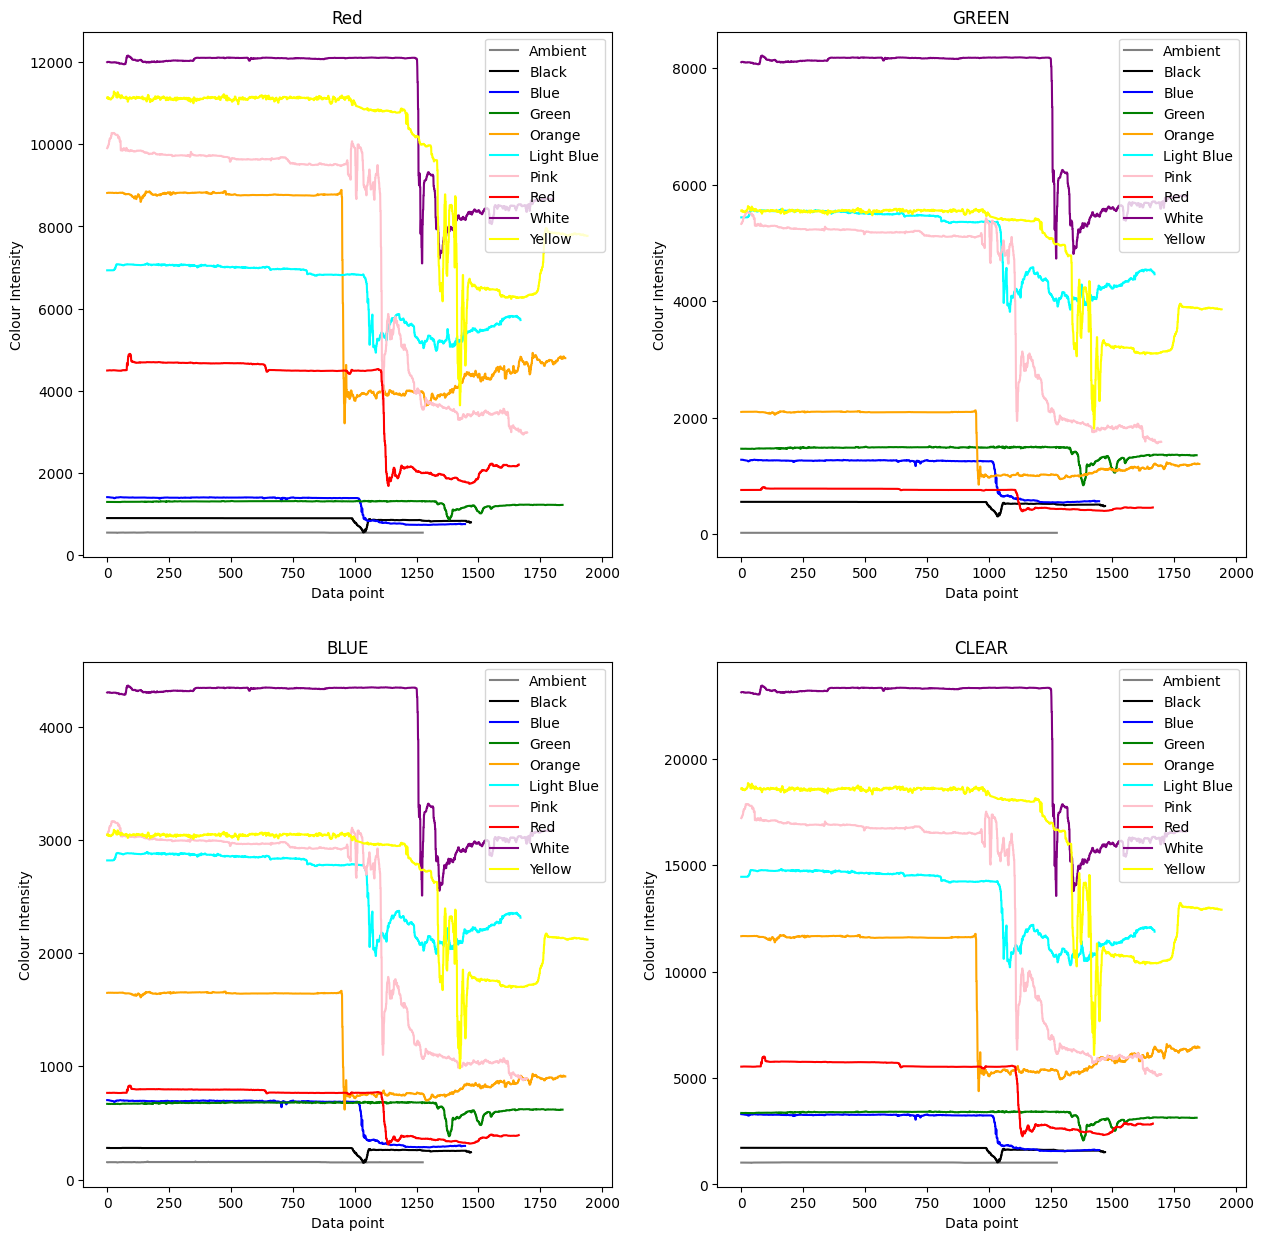

In [27]:
colours = np.array(['ambient', 'black', 'blue', 'green', 'orange', 'pale_blue', 'pink', 'white', 'yellow'])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax[0, 0].plot(np.arange(0, len(ambient), 1), ambient['Red'], c='grey', label='Ambient')
ax[0, 0].plot(np.arange(0, len(black), 1), black['Red'], c='k', label='Black')
ax[0, 0].plot(np.arange(0, len(blue), 1), blue['Red'], c='blue', label='Blue')
ax[0, 0].plot(np.arange(0, len(green), 1), green['Red'], c='green', label='Green')
ax[0, 0].plot(np.arange(0, len(orange), 1), orange['Red'], c='orange', label='Orange')
ax[0, 0].plot(np.arange(0, len(pale_blue), 1), pale_blue['Red'], c='aqua', label='Light Blue')
ax[0, 0].plot(np.arange(0, len(pink), 1), pink['Red'], c='pink', label='Pink')
ax[0, 0].plot(np.arange(0, len(red), 1), red['Red'], c='red', label='Red')
ax[0, 0].plot(np.arange(0, len(white), 1), white['Red'], c='purple', label='White')
ax[0, 0].plot(np.arange(0, len(yellow), 1), yellow['Red'], c='yellow', label='Yellow')
ax[0, 0].set_title("Red")
ax[0, 0].set_ylabel("Colour Intensity")
ax[0, 0].set_xlabel("Data point")
ax[0, 0].legend(loc="upper right")

ax[0, 1].plot(np.arange(0, len(ambient), 1), ambient['Sat'], c='grey', label='Ambient')
ax[0, 1].plot(np.arange(0, len(black), 1), black['Green'], c='k', label='Black')
ax[0, 1].plot(np.arange(0, len(blue), 1), blue['Green'], c='blue', label='Blue')
ax[0, 1].plot(np.arange(0, len(green), 1), green['Green'], c='green', label='Green')
ax[0, 1].plot(np.arange(0, len(orange), 1), orange['Green'], c='orange', label='Orange')
ax[0, 1].plot(np.arange(0, len(pale_blue), 1), pale_blue['Green'], c='aqua', label='Light Blue')
ax[0, 1].plot(np.arange(0, len(pink), 1), pink['Green'], c='pink', label='Pink')
ax[0, 1].plot(np.arange(0, len(red), 1), red['Green'], c='red', label='Red')
ax[0, 1].plot(np.arange(0, len(white), 1), white['Green'], c='purple', label='White')
ax[0, 1].plot(np.arange(0, len(yellow), 1), yellow['Green'], c='yellow', label='Yellow')
ax[0, 1].set_title("GREEN")
ax[0, 1].set_ylabel("Colour Intensity")
ax[0, 1].set_xlabel("Data point")
ax[0, 1].legend(loc="upper right")


ax[1, 0].plot(np.arange(0, len(ambient), 1), ambient['Blue'], c='grey', label='Ambient')
ax[1, 0].plot(np.arange(0, len(black), 1), black['Blue'], c='k', label='Black')
ax[1, 0].plot(np.arange(0, len(blue), 1), blue['Blue'], c='blue', label='Blue')
ax[1, 0].plot(np.arange(0, len(green), 1), green['Blue'], c='green', label='Green')
ax[1, 0].plot(np.arange(0, len(orange), 1), orange['Blue'], c='orange', label='Orange')
ax[1, 0].plot(np.arange(0, len(pale_blue), 1), pale_blue['Blue'], c='aqua', label='Light Blue')
ax[1, 0].plot(np.arange(0, len(pink), 1), pink['Blue'], c='pink', label='Pink')
ax[1, 0].plot(np.arange(0, len(red), 1), red['Blue'], c='red', label='Red')
ax[1, 0].plot(np.arange(0, len(white), 1), white['Blue'], c='purple', label='White')
ax[1, 0].plot(np.arange(0, len(yellow), 1), yellow['Blue'], c='yellow', label='Yellow')
ax[1, 0].set_title("BLUE")
ax[1, 0].set_ylabel("Colour Intensity")
ax[1, 0].set_xlabel("Data point")
ax[1, 0].legend(loc="upper right")


ax[1, 1].plot(np.arange(0, len(ambient), 1), ambient['Clear'], c='grey', label='Ambient')
ax[1, 1].plot(np.arange(0, len(black), 1), black['Clear'], c='k', label='Black')
ax[1, 1].plot(np.arange(0, len(blue), 1), blue['Clear'], c='blue', label='Blue')
ax[1, 1].plot(np.arange(0, len(green), 1), green['Clear'], c='green', label='Green')
ax[1, 1].plot(np.arange(0, len(orange), 1), orange['Clear'], c='orange', label='Orange')
ax[1, 1].plot(np.arange(0, len(pale_blue), 1), pale_blue['Clear'], c='aqua', label ='Light Blue')
ax[1, 1].plot(np.arange(0, len(pink), 1), pink['Clear'], c='pink', label='Pink')
ax[1, 1].plot(np.arange(0, len(red), 1), red['Clear'], c='red', label='Red')
ax[1, 1].plot(np.arange(0, len(white), 1), white['Clear'], c='purple', label='White')
ax[1, 1].plot(np.arange(0, len(yellow), 1), yellow['Clear'], c='yellow', label='Yellow')
ax[1, 1].set_title("CLEAR")
ax[1, 1].set_ylabel("Colour Intensity")
ax[1, 1].set_xlabel("Data point")
ax[1, 1].legend(loc="upper right")


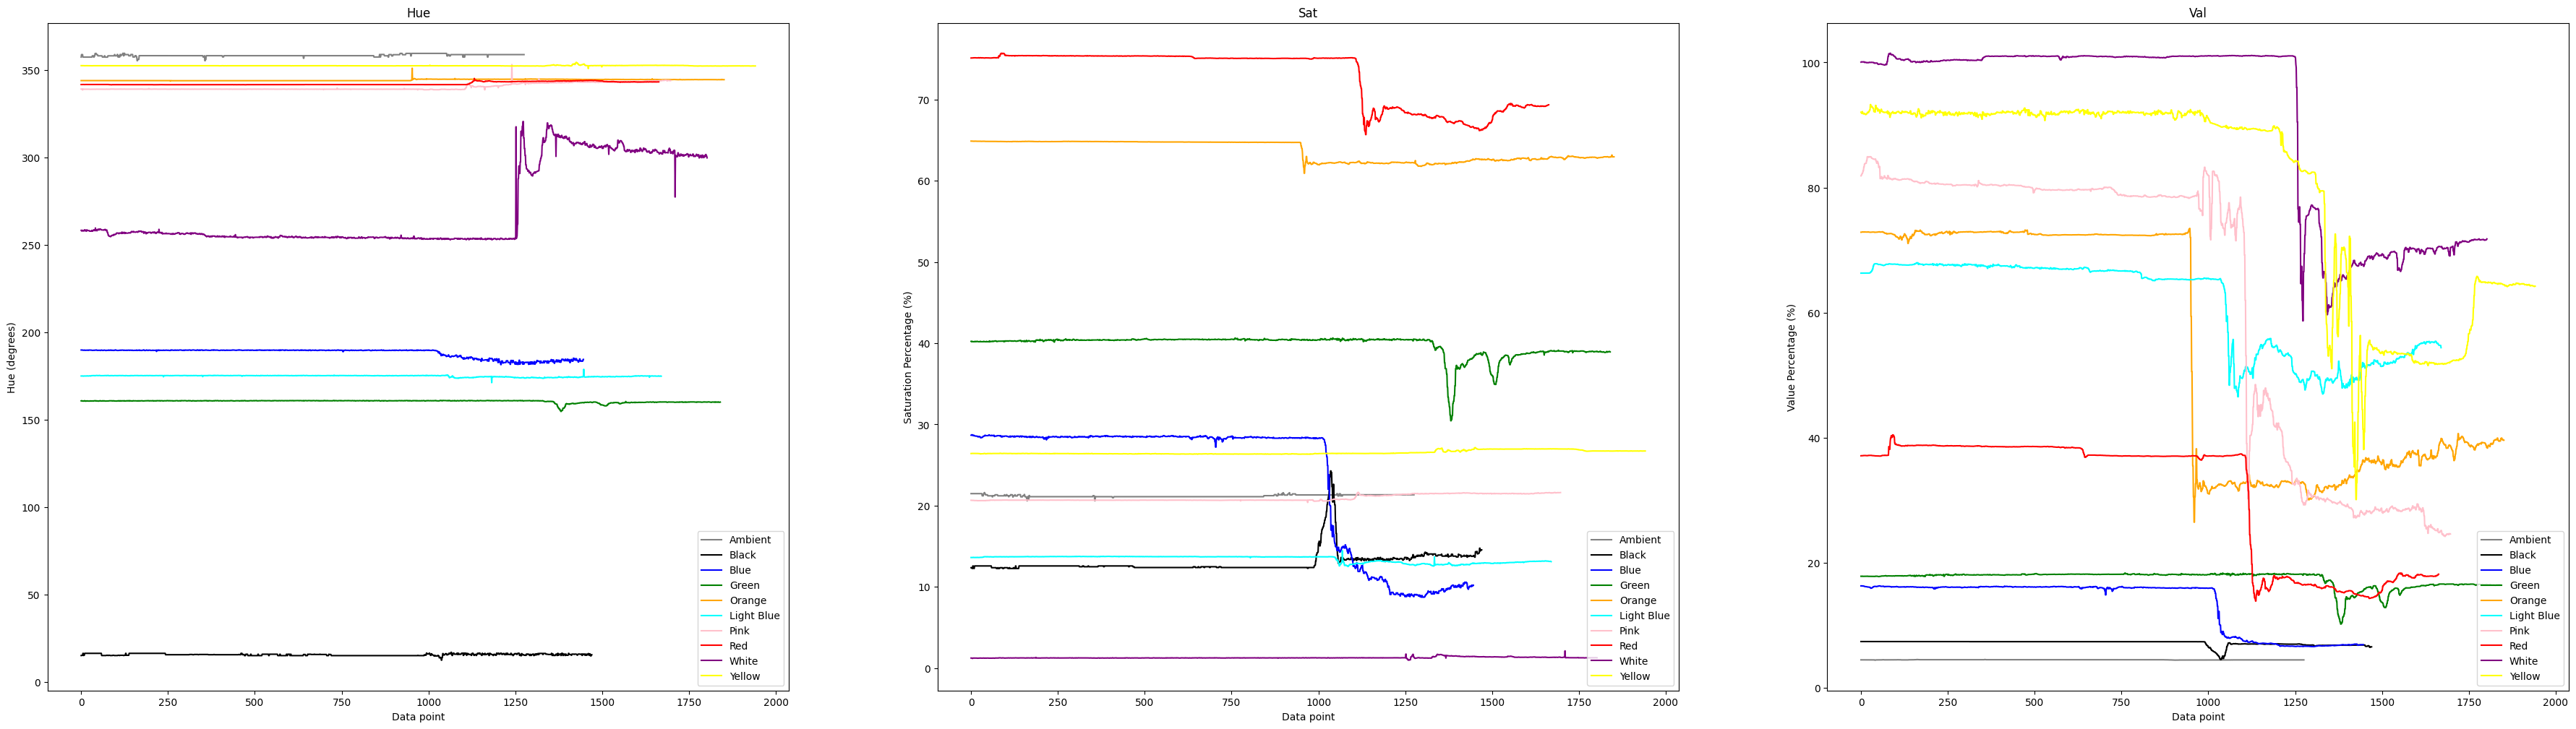

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(45,12))
ax[0].plot(np.arange(0, len(ambient), 1), ambient['Hue'], c='grey', label='Ambient')
ax[0].plot(np.arange(0, len(black), 1), black['Hue'], c='k', label='Black')
ax[0].plot(np.arange(0, len(blue), 1), blue['Hue'], c='blue', label='Blue')
ax[0].plot(np.arange(0, len(green), 1), green['Hue'], c='green', label='Green')
ax[0].plot(np.arange(0, len(orange), 1), orange['Hue'], c='orange', label='Orange')
ax[0].plot(np.arange(0, len(pale_blue), 1), pale_blue['Hue'], c='aqua', label='Light Blue')
ax[0].plot(np.arange(0, len(pink), 1), pink['Hue'], c='pink', label='Pink')
ax[0].plot(np.arange(0, len(red), 1), red['Hue'], c='red', label='Red')
ax[0].plot(np.arange(0, len(white), 1), white['Hue'], c='purple', label='White')
ax[0].plot(np.arange(0, len(yellow), 1), yellow['Hue'], c='yellow', label='Yellow')
ax[0].set_title("Hue")
ax[0].set_ylabel("Hue (degrees)")
ax[0].set_xlabel("Data point")
ax[0].legend(loc="lower right")


ax[1].plot(np.arange(0, len(ambient), 1), ambient['Sat'], c='grey', label='Ambient')
ax[1].plot(np.arange(0, len(black), 1), black['Sat'], c='k', label='Black')
ax[1].plot(np.arange(0, len(blue), 1), blue['Sat'], c='blue', label='Blue')
ax[1].plot(np.arange(0, len(green), 1), green['Sat'], c='green', label='Green')
ax[1].plot(np.arange(0, len(orange), 1), orange['Sat'], c='orange', label='Orange')
ax[1].plot(np.arange(0, len(pale_blue), 1), pale_blue['Sat'], c='aqua', label='Light Blue')
ax[1].plot(np.arange(0, len(pink), 1), pink['Sat'], c='pink', label='Pink')
ax[1].plot(np.arange(0, len(red), 1), red['Sat'], c='red', label='Red')
ax[1].plot(np.arange(0, len(white), 1), white['Sat'], c='purple', label='White')
ax[1].plot(np.arange(0, len(yellow), 1), yellow['Sat'], c='yellow', label='Yellow')
ax[1].set_title("Sat")
ax[1].set_ylabel("Saturation Percentage (%)")
ax[1].set_xlabel("Data point")
ax[1].legend(loc="lower right")


ax[2].plot(np.arange(0, len(ambient), 1), ambient['Val'], c='grey', label='Ambient')
ax[2].plot(np.arange(0, len(black), 1), black['Val'], c='k', label='Black')
ax[2].plot(np.arange(0, len(blue), 1), blue['Val'], c='blue', label='Blue')
ax[2].plot(np.arange(0, len(green), 1), green['Val'], c='green', label='Green')
ax[2].plot(np.arange(0, len(orange), 1), orange['Val'], c='orange', label='Orange')
ax[2].plot(np.arange(0, len(pale_blue), 1), pale_blue['Val'], c='aqua', label='Light Blue')
ax[2].plot(np.arange(0, len(pink), 1), pink['Val'], c='pink', label='Pink')
ax[2].plot(np.arange(0, len(red), 1), red['Val'], c='red', label='Red')
ax[2].plot(np.arange(0, len(white), 1), white['Val'], c='purple', label='White')
ax[2].plot(np.arange(0, len(yellow), 1), yellow['Val'], c='yellow', label='Yellow')
ax[2].set_title("Val")
ax[2].set_ylabel("Value Percentage (%)")
ax[2].set_xlabel("Data point")
ax[2].legend(loc="lower right")


